In [1]:
import maintsim

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
sys = maintsim.System(process_times=[3, 5, 2],
                      failure_mode='degradation',
                      failure_params=[0.4]*3,
                      initial_health=[0,0,8],
                      maintenance_policy='CBM',
                      maintenance_params={'CBM threshold':[8,8,6]},
                      repair_params={'CM':stats.randint(10,20),
                                     'CBM':stats.randint(5,10)},
                      scheduler=maintsim.Scheduler(),
                      #scheduler_class=maintsim.Scheduler,
                      maintenance_capacity=1,
                      allow_new_maintenance=True)#,
                      #planned_failures=[(1,30,20)])

In [3]:
sys.simulate(sim_time=100)

M2 repaired at t=8
M0 failed at t=28
M1 failed at t=28
M2 repaired at t=29
M0 repaired at t=43
M2 failed at t=53
M1 repaired at t=57
M0 failed at t=64
M2 repaired at t=70
M0 repaired at t=81
M2 repaired at t=91
M1 repaired at t=98
Simulation complete in 0.27s

  Units produced:      10
  System availability: 74.67%



In [4]:
sys.maintenance_data

,time,machine,type,activity,duration
0,1,2,CBM,failure,NA
1,8,2,CBM,repair,6
2,21,2,CBM,failure,13
3,23,0,CBM,failure,NA
4,24,0,CBM,failure,NA
5,26,1,CBM,failure,NA
6,27,1,CBM,failure,NA
7,28,0,CM,failure,NA
8,28,1,CM,failure,NA
9,29,2,CBM,repair,7


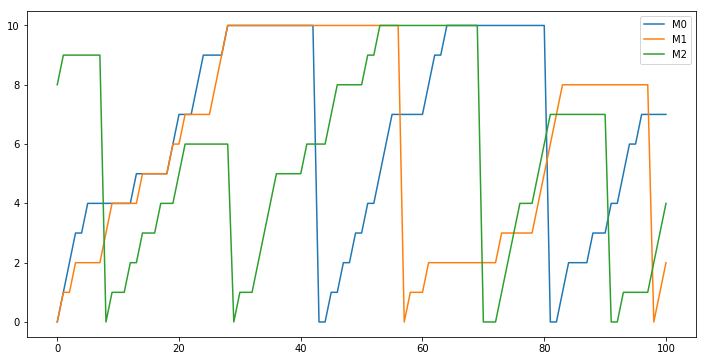

In [5]:
plt.figure(figsize=(12,6))
for i in range(sys.M):
    plt.plot(sys.machine_data['M{} health'.format(i)], label='M{}'.format(i))
plt.legend()
plt.show()

In [14]:
# initiation test
sys = maintsim.System(process_times=[3, 5, 2],
                      initial_remaining_process=[3,3,1],
                      buffer_sizes=5,
                      initial_buffer=[5,0],
                      failure_mode='degradation',
                      failure_params=[0.3]*3,
                      initial_health=[8, 5, 3],
                      repair_params={'CM':stats.randint(10,20)},
                      scheduler_class=maintsim.Scheduler,
                      maintenance_capacity=1)                      

In [15]:
sys.simulate(sim_time=100)

Simulation complete in 0.19s

  Units produced:      4
  System availability: 76.33%



In [16]:
sys.machine_data

,time,M0 functional,M0 forced idle,M0 health,M1 functional,M1 forced idle,M1 health,M2 functional,M2 forced idle,M2 health
0,0.0,1,0,8.0,1,0,5.0,1,1,3.0
1,1.0,1,0,8.0,1,0,6.0,1,1,3.0
2,2.0,1,0,8.0,1,0,7.0,1,1,3.0
3,3.0,1,0,9.0,1,0,7.0,1,0,3.0
4,4.0,1,0,9.0,1,0,8.0,1,1,3.0
5,5.0,1,0,9.0,1,0,8.0,1,1,3.0
6,6.0,1,1,9.0,1,0,8.0,1,1,4.0
7,7.0,1,1,9.0,1,0,8.0,1,1,4.0
8,8.0,1,1,10.0,1,1,9.0,1,0,4.0
9,9.0,0,1,10.0,1,1,10.0,1,0,4.0


In [8]:
d.keys()

dict_keys([0, 1, 2, 3, 4])

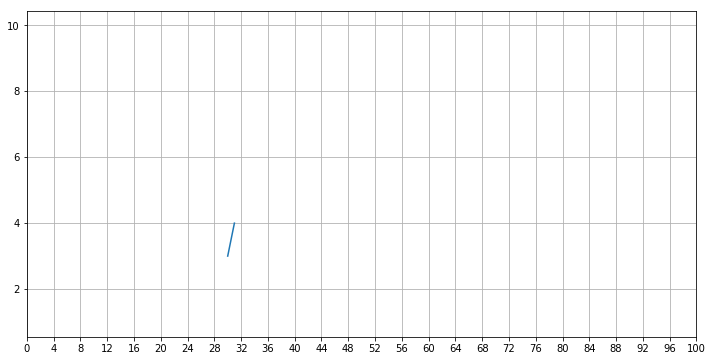

In [5]:
plt.figure(figsize=(12,6))
plt.plot(sys.machine_data['M1 health'])
plt.xticks(list(range(0,101,4)))
plt.grid()
plt.show()

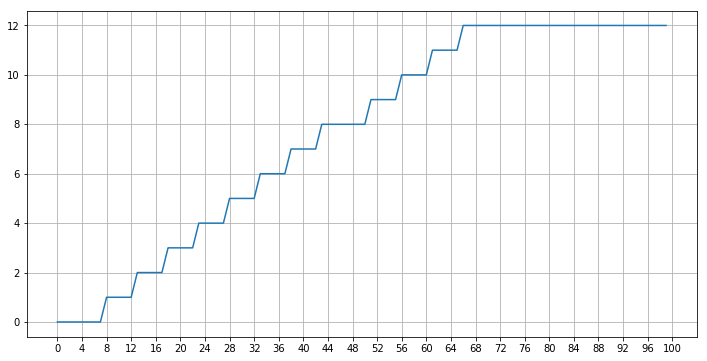

In [7]:
plt.figure(figsize=(12,6))
plt.plot(sys.production_data['M1 production'])
plt.xticks(list(range(0,101,4)))
plt.grid()
plt.show()